In [1]:
import numpy as np
from numba import njit
from scipy.linalg import svd, qr, inv, pinv
import matplotlib.pyplot as plt


In [2]:
import pymc3 as pm

def _model(theta, x):
    return theta[0] + theta[1] * x

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [5]:
theta = np.asarray([0.5, 2])
N = 10

# np.random.seed(10)
x =  np.random.rand(N) * 20
x = np.sort(x)
y = _model(theta, x)

# x = np.random.normal(x, 5)
y = np.random.normal(y, 5)

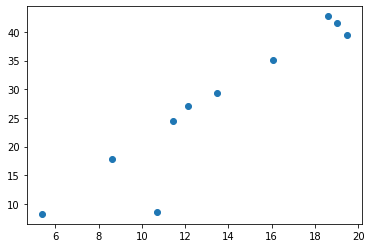

In [6]:
plt.plot(x, y, 'o')

In [ ]:
with pm.Model() as model:
    
    # Define priors
    sigma = pm.HalfNormal("sigma", sd=2)
    
#     theta = Normal('beta', mu=0, sd=10, shape=2)
    
    slope = pm.Normal('slope', mu=5, sd=10)
    intercept = pm.Normal('intercept', mu=0, sd=10)
    
#     theta  = pm.Normal('theta', mu=np.array([0.5, 2]), sigma=np.array([10, 10]))
    
    # Define likelihood
    likelihood = pm.Normal('y', mu=intercept + slope * x, sd=sigma, observed=y)

    # Inference!
    trace = pm.sample(10000, step=pm.HamiltonianMC(), cores=4) # draw 3000 posterior samples using NUTS sampling

Multiprocess sampling (4 chains in 4 jobs)
HamiltonianMC: [intercept, slope, sigma]


(0, 500)

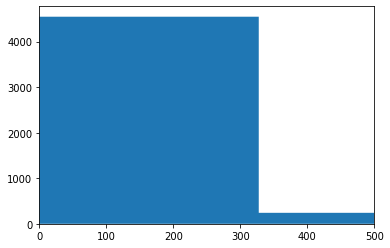

In [6]:
# res = plt.hist(sigma.random(size=50000), bins=500, histtype="stepfilled")
with pm.Model() as model:
    h = pm.HalfCauchy('h', beta=50)
res = plt.hist(h.random(size=5000), bins=500, histtype="stepfilled")     
plt.xlim(0, 500)
# res = plt.hist(intercept.random(size=50000), bins=500, histtype="stepfilled")               

c:\users\dominik\appdata\local\programs\python\python37\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
c:\users\dominik\appdata\local\programs\python\python37\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
c:\users\dominik\appdata\local\programs\python\python37\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC0E290C08>,
      dtype=object)

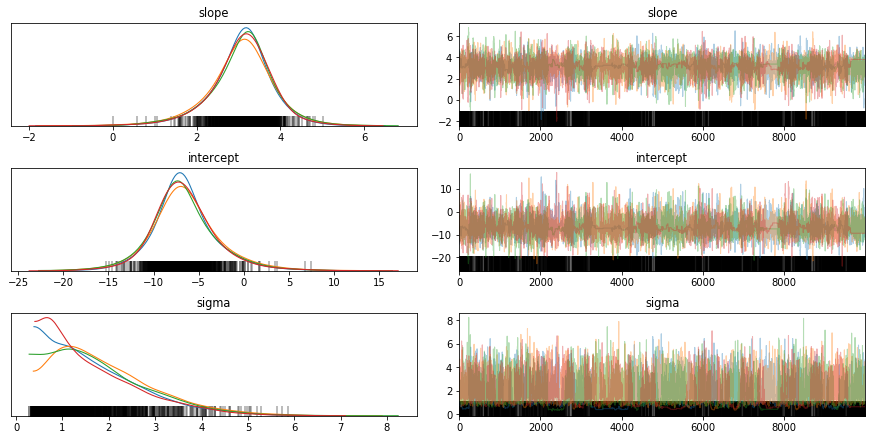

In [47]:
pm.traceplot(trace[:])

In [41]:
trace["slope"].shape

(40000,)

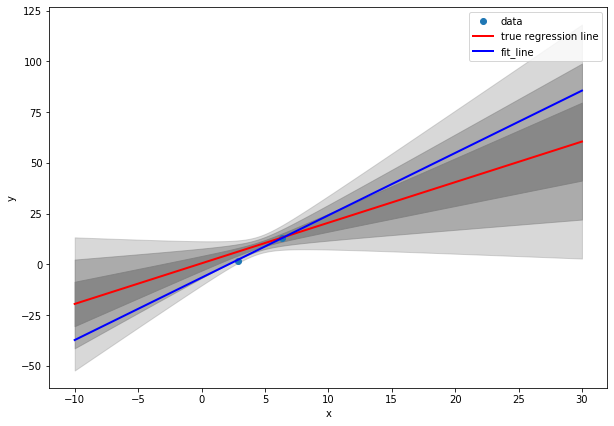

In [48]:
plt.figure(figsize=(10, 7))
plt.plot(x, y, 'o', label='data')

slope_samples = trace[100:]['slope']
int_samples = trace[100:]['intercept']

_x = np.linspace(-10, 30, 500)

lines = slope_samples[:, None] * _x[None, :] + int_samples[:, None]

# plt.plot(x, lines[::100].T, lw=0.1, color='gray')

true_y = theta[0] + theta[1] * _x
plt.plot(_x, true_y, label='true regression line', lw=2., c='r')


stds = np.std(lines, axis=0)
slope_avrg = slope_samples.mean()
int_avrg = int_samples.mean()
line_avrg = slope_avrg  * _x + int_avrg

plt.fill_between(_x, true_y + stds, true_y - stds, color=(0.5, 0.5, 0.5, 0.8))
plt.fill_between(_x, true_y + 2 * stds, true_y - 2 * stds, color=(0.5, 0.5, 0.5, 0.5))
plt.fill_between(_x, true_y + 3 * stds, true_y - 3 * stds, color=(0.5, 0.5, 0.5, 0.3))

plt.plot(_x, line_avrg, label='fit_line', lw=2., c='b')



# plt.title('Posterior predictive regression lines')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.show()


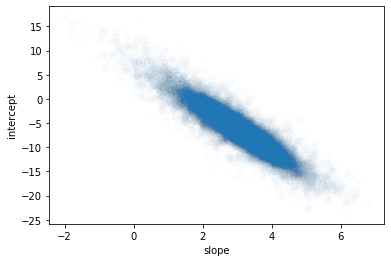

In [49]:
plt.plot(slope_samples[::1], int_samples[::1], 'o', alpha=0.01)
plt.xlabel('slope')
plt.ylabel('intercept')
plt.show()

In [86]:
samples = poisson_param.random(size=500000)

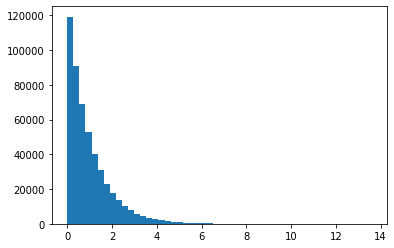

In [90]:
res = plt.hist(samples, bins=50, histtype="stepfilled")

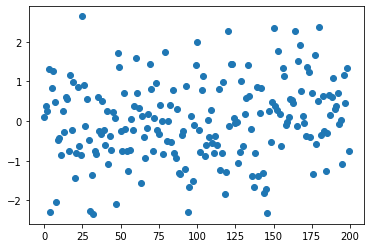

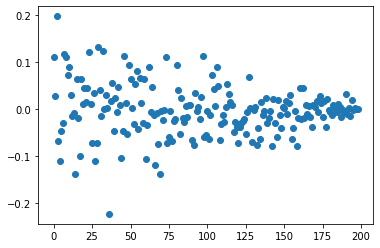

In [37]:
x = np.random.normal(0, 1, size=200)

corr =np.correlate(x, x, mode='full')
corr /= corr.max()
corr = corr[corr.size // 2 + 1:]

plt.plot(x, 'o')
plt.show()
plt.plot(corr, 'o')